<a href="https://colab.research.google.com/github/anagha102/Predict-if-a-note-is-genuine-or-not/blob/main/Predict_if_a_note_is_genuine_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. 
Therefore in this notebook, we'll be performing Binary Classification to predict if a note is genuine or not.

There are 2 classes:

Note is genuine (class=1)
Note is not genuine (class=0)

# **Agenda:**
1. About the Dataset
2. Objective
3. Loading Libraries
4. Loading Data
5. Separating Input and target Variable
6. Split The Data into Train and Test Set
7. Train the model :

    A. Define the model.
    B. Compile the model.
    C. Fit the model.
    D. Evaluate the model
    E. Hyperparameter Tunning (if required)
8. Conclusion

## **About the Dataset:**
This dataset contains 1096 observations and 5 attributes. Target variable refers to attribute 'Class'.

VWTI: Variance of Wavelet Transformed Image

SWTI: Skewness of Wavelet Transformed Image

CWTI: Curtosis of Wavelet Transformed Image

EI: Entropy of Image

Class: Class (1: genuine, 0: forged) ]

## **Objective:**
To predict if note is genuine or not. 

## **Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Loading Data**

In [ ]:
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [ ]:
bank_note_data.head()

VWTI     SWTI     CWTI        EI  Class
0  2.2634  -4.4862   3.6558 -0.612510      0
1  3.2718   1.7837   2.1161  0.613340      0
2 -3.9411 -12.8792  13.0597 -3.312500      1
3  0.5195  -3.2633   3.0895 -0.984900      0
4  2.5698  -4.4076   5.9856  0.078002      0

## **Separating Input and Target Variable:**
Our objective is to detect the note is genuine or not. Thus, our target variable will be the column that indicates whether note is genuine or not.

In [ ]:
X = bank_note_data.drop('Class', axis=1) #Input variables
y = bank_note_data['Class']  # Target variable


## **Splitting into Train and Test Sets:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Train the Model:**

In [ ]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

### **A. Defining model:**
Models can be defined either with the Sequential API or the Functional API. Here we will define the model with Sequential API.

In [ ]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

### **B. Compile the Model:**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


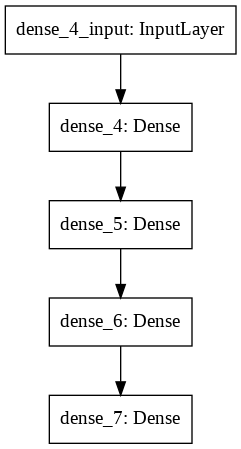

In [ ]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

### **C. Fit the Model**

In [ ]:
history = model.fit(X_train, y_train,validation_split=0.2,epochs=100, verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 9ms/step - loss: 0.4551 - accuracy: 0.8286 - val_loss: 0.3379 - val_accuracy: 0.8920
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2983 - accuracy: 0.9286 - val_loss: 0.2232 - val_accuracy: 0.9659
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2056 - accuracy: 0.9829 - val_loss: 0.1530 - val_accuracy: 0.9773
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.9886 - val_loss: 0.1043 - val_accuracy: 0.9716
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9943 - val_loss: 0.0735 - val_accuracy: 0.9830
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.9971 - val_loss: 0.0507 - val_accuracy: 0.9886
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9986 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 8/100
2

### **D. Model Evaluation:**

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.2503e-08 - accuracy: 1.0000


[1.2503068802516282e-08, 1.0]

**Model Accuracy Graph**

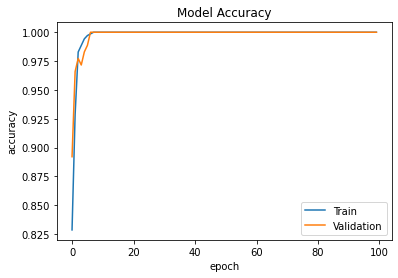

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Model Loss Graph**

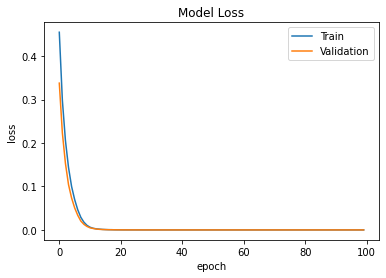

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## **Conclusion:**
Training accuracy: 1.0
Testing accuracy: 1.0